In [1]:
import numpy as np
import psycopg2
import hdf5storage
import h5py
import pickle
import logging
from sys import getsizeof
from dotenv import dotenv_values
import dask.array as da
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt

config = dotenv_values("../.env")
# Filepaths for script
filepath = config["currentDirectory"] +"data/archivedDataSets/ContiguousAssembly/"

In [ ]:
def generateExpRobotReferenceTrajectory(startTimeStep,bias, numSteps, trialNumber):
    # Read in file
    filename = config["currentDirectory"]+"data/archivedDataSets/ContiguousAssembly/experimentalRefTrajectories.h5"
    # Load in h5 file
    with h5py.File(filename, 'r') as f:
        data = f['refsUncentered'][:]
    return data[trialNumber,startTimeStep+bias:startTimeStep+numSteps+bias,:].T


In [ ]:
physExpsFilename = config["currentDirectory"]+"data/archivedDataSets/ContiguousAssembly/experimentalRefTrajectories.h5"
# Load in h5 file
with h5py.File(physExpsFilename, 'r') as f:
    trialParamString = f['trialParameters'][:].astype(str)[2,0]
print(trialParamString)


amp_(20_50_20)_freq_0.67L


Trajectory shape: (40, 1000)


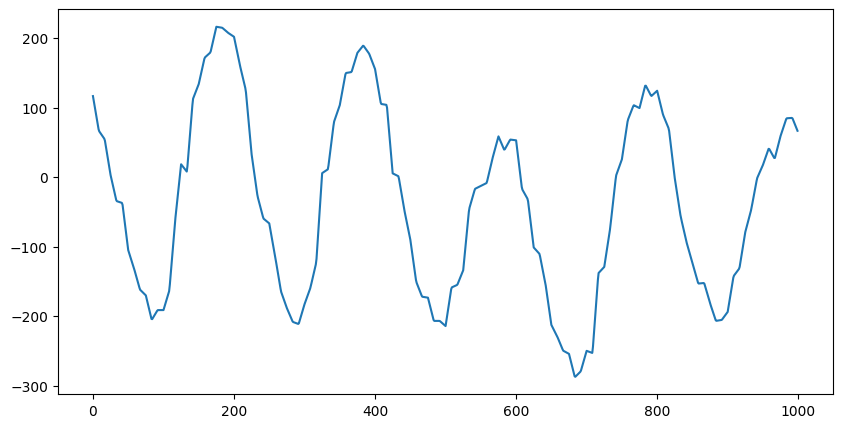

In [36]:
trajectory = generateExpRobotReferenceTrajectory(0,500,1000,5)
print("Trajectory shape:", trajectory.shape)
# Plot ith element of the trajectory
plt.figure(figsize=(10, 5))
plt.plot(trajectory[1, :], label='X Position')